# Customer Lifetime Value Project – EDA Notebook 🧠📊

This notebook explores the RFM features created from the raw Amazon e-commerce data.

---

## 🔁 1. Load RFM Data

In [3]:
import sys
import os
os.chdir("..")
# Добавляем src в sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))


In [4]:
import pandas as pd
from src.data_preparation.prepare_data import load_raw_data, clean_data
from src.feature_engineering.engineer_features import create_rfm_features

df = clean_data(load_raw_data())
rfm_df = create_rfm_features(df, customer_id_col='CustomerID', invoice_date_col='Order date', amount_col='TotalPrice')

rfm_df.head()

,Recency,Frequency,Monetary,AveragePurchaseValue,CustomerLifespan,MeanDaysBetweenPurchases
CustomerID,,,,,,
R_01vNIayewjIIKMF,797,140,4920.01,35.142929,2081,14.864286
R_037XK72IZBJyF69,611,1213,17589.89,14.501146,2401,1.979390
R_038ZU6kfQ5f89fH,904,69,4247.54,61.558551,2067,29.956522
R_03aEbghUILs9NxD,544,173,3882.98,22.444971,2406,13.907514
R_06RZP9pS7kONINr,639,430,11223.70,26.101628,2396,5.572093


## 2. Summary Statistics

In [5]:
rfm_df.describe()

,Recency,Frequency,Monetary,AveragePurchaseValue,CustomerLifespan,MeanDaysBetweenPurchases
count,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000,5027.000000
mean,618.701611,368.155361,8763.404241,26.201522,2247.062861,27.214318
std,146.768395,426.407538,9782.756813,12.404197,309.012763,64.522061
min,0.000000,1.000000,1.840000,1.840000,0.000000,0.000000
25%,534.000000,92.000000,2254.065000,19.053317,2238.000000,4.785410
50%,603.000000,232.000000,5706.990000,23.856875,2392.000000,9.744939
75%,637.000000,489.000000,11706.020000,29.994104,2412.000000,23.737895
max,2245.000000,5415.000000,115391.180000,194.203256,2418.000000,1169.500000


In [6]:
rfm_df.corr()

,Recency,Frequency,Monetary,AveragePurchaseValue,CustomerLifespan,MeanDaysBetweenPurchases
Recency,1.000000,-0.201781,-0.211413,0.056945,-0.086516,0.465659
Frequency,-0.201781,1.000000,0.911139,-0.166943,0.279404,-0.282545
Monetary,-0.211413,0.911139,1.000000,0.066224,0.295717,-0.284637
AveragePurchaseValue,0.056945,-0.166943,0.066224,1.000000,-0.003746,0.125602
CustomerLifespan,-0.086516,0.279404,0.295717,-0.003746,1.000000,-0.240176
MeanDaysBetweenPurchases,0.465659,-0.282545,-0.284637,0.125602,-0.240176,1.000000


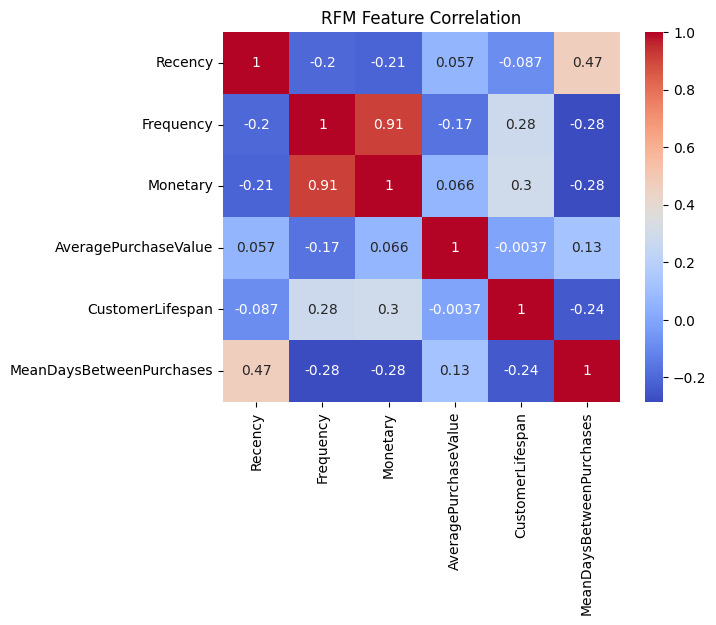

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(rfm_df.corr(), annot=True, cmap='coolwarm')
plt.title("RFM Feature Correlation")
plt.show()

## 3. Distributions

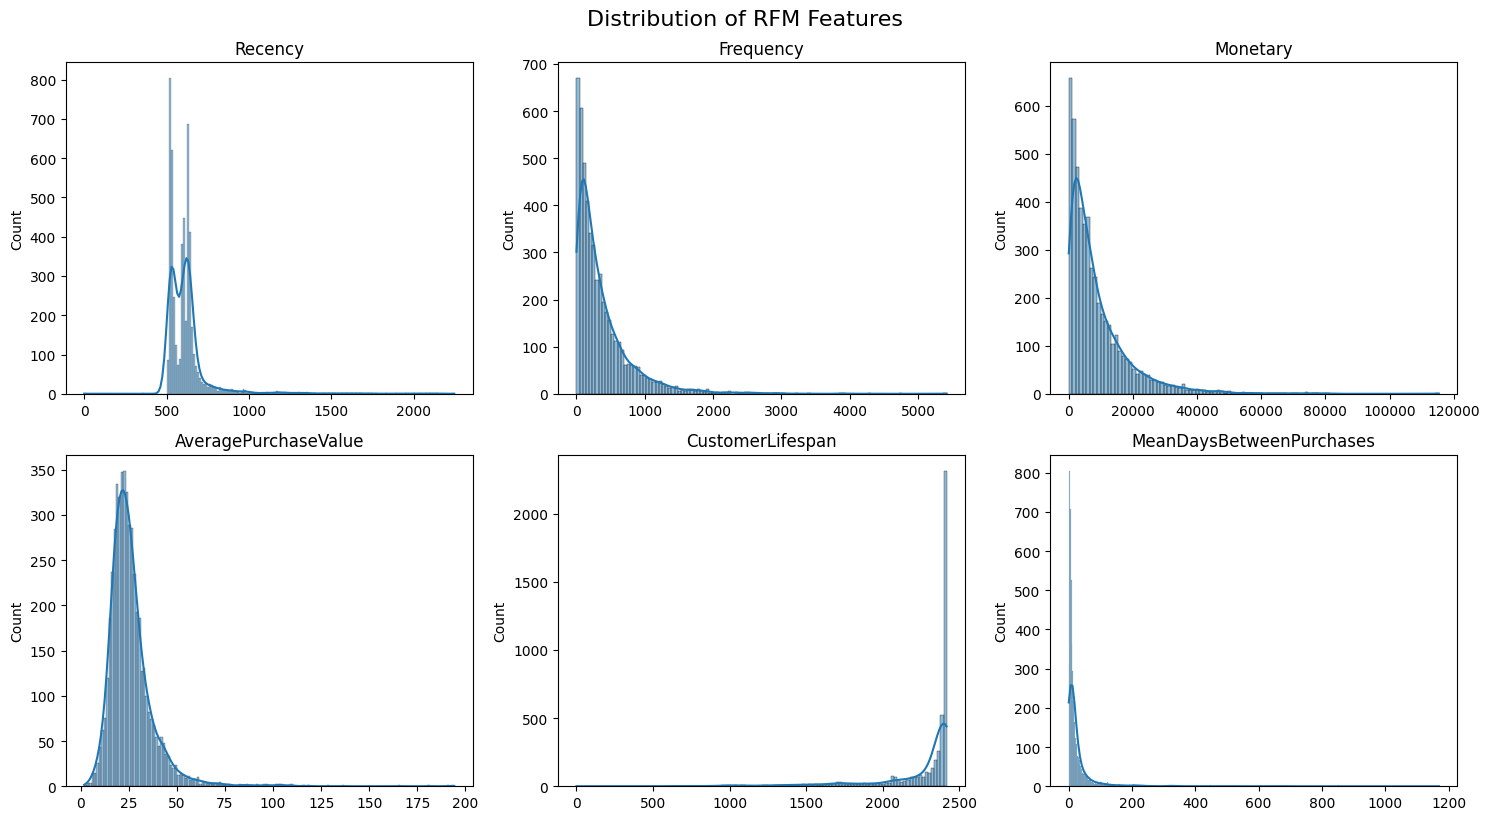

In [12]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(rfm_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(rfm_df[col], kde=True)
    plt.title(col)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Distribution of RFM Features", fontsize=16, y=1.02)
plt.show()

## 4. Features outliers

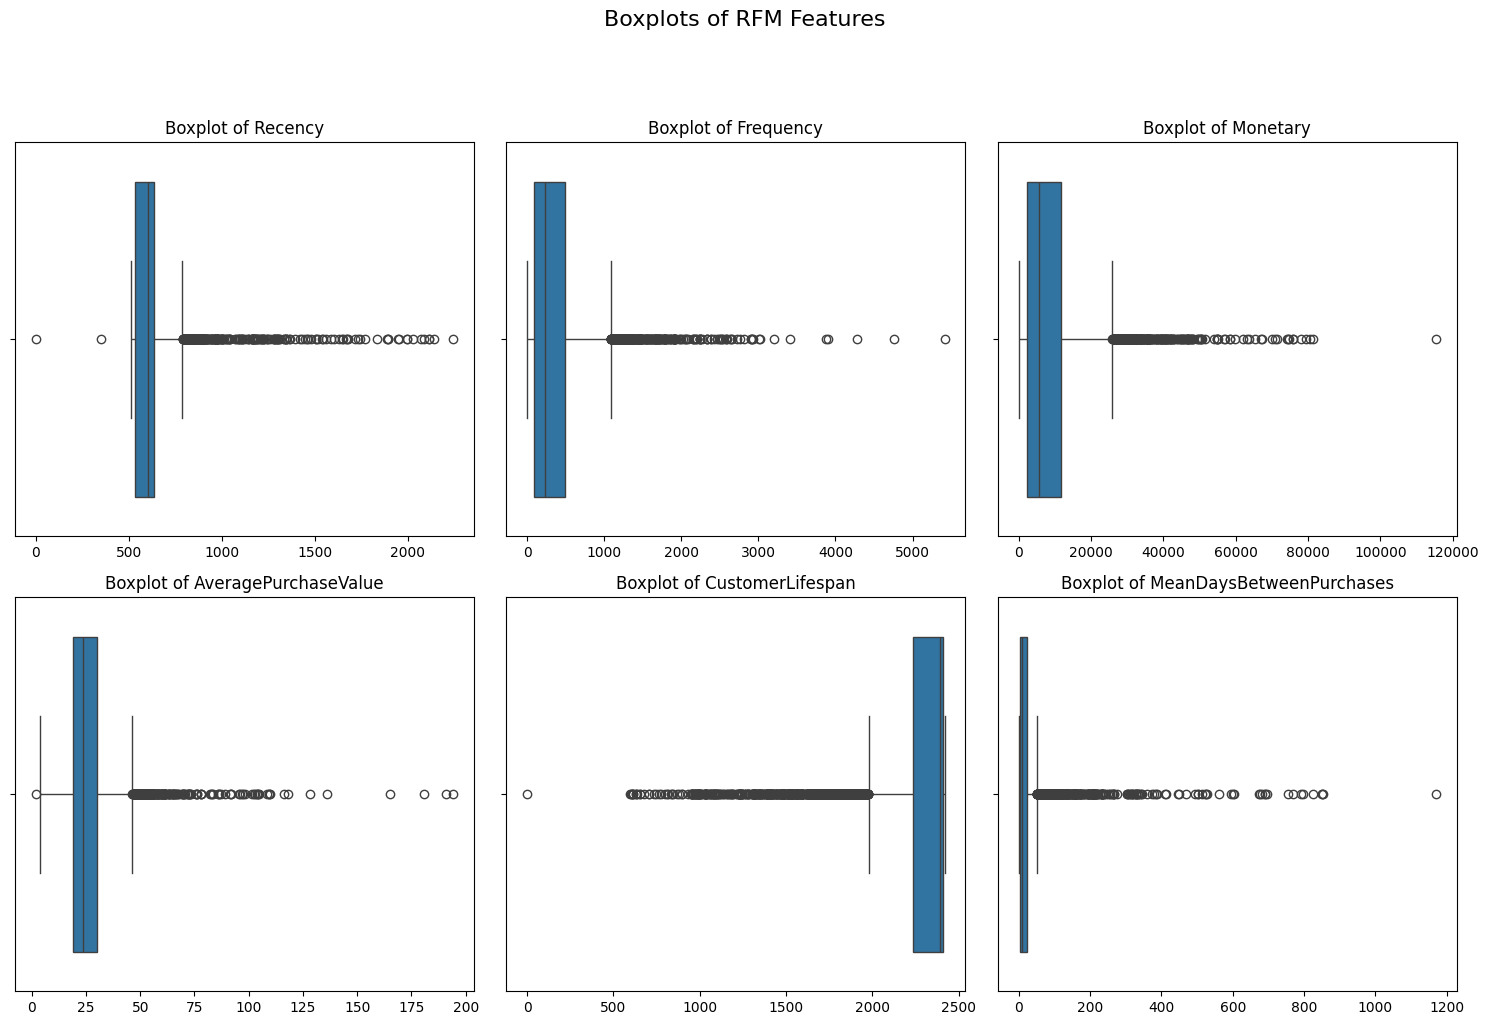

In [19]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(rfm_df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=rfm_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel("")

plt.suptitle("Boxplots of RFM Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## 5. CLV Feature Creation

In [21]:
rfm_df["CLV"] = rfm_df["Monetary"] * rfm_df["Frequency"]

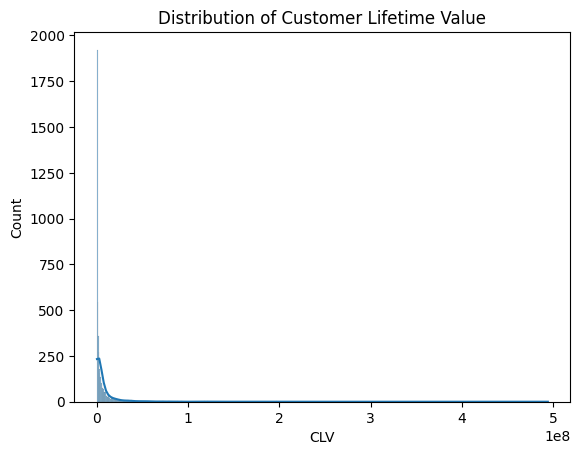

In [22]:
sns.histplot(rfm_df["CLV"], kde=True)
plt.title("Distribution of Customer Lifetime Value")
plt.show()